# Storytelling
Empresa de copo descartável
Problema: quantidade de copos com problema
Resolução: troca de máquina defeituosa

copos de plastico descartável 1000 -> 150 com problema Reais 0.20 centavos
copos de plastico de festa 1000 -> 200 com problema Reais 1.00 real
copos de isopor 1000 -> 100 com problema Reais 0.30 centavos
Máquina nova = Reais 28000



In [ ]:
import matplotlib.pyplot as plt

# Dados iniciais
copos_total = 3000
lista_copos = {
    "plastico": 1000,
    "polipropileno": 1000,
    "isopor": 1000
}
lista_valores = {
    "plastico": 0.20,
    "polipropileno": 1.00,
    "isopor": 0.30
}
lista_copos_defeito = {
    "plastico": 150,
    "polipropileno": 200,
    "isopor": 100
}

# Função para calcular prejuízo
def calcular_prejuizo(lista_copos_defeito, lista_valores):
    prejuizo_total = 0
    for material, quantidade in lista_copos_defeito.items():
        prejuizo = quantidade * lista_valores[material]
        prejuizo_total += prejuizo
    return prejuizo_total

In [ ]:
# Função para calcular faturamento
def calcular_faturamento(lista_copos, lista_copos_defeito, lista_valores):
    faturamento_total = 0
    for material, quantidade in lista_copos.items():
        faturamento = (quantidade - lista_copos_defeito[material]) * lista_valores[material]
        faturamento_total += faturamento
    return faturamento_total


In [ ]:
# Cálculos antes da instalação da máquina
prejuizo_diario = calcular_prejuizo(lista_copos_defeito, lista_valores)
prejuizo_mensal = prejuizo_diario * 30
faturamento_diario = calcular_faturamento(lista_copos, lista_copos_defeito, lista_valores)
faturamento_mensal = faturamento_diario * 30
faturamento_anual = faturamento_mensal * 12

In [ ]:
# Cálculos após a instalação da máquina (supondo que o prejuízo seja zerado)
prejuizo_diario_conserto = 0
prejuizo_mensal_conserto = 0
faturamento_diario_conserto = calcular_faturamento(lista_copos, {"plastico": 0, "polipropileno": 0, "isopor": 0}, lista_valores)
faturamento_mensal_conserto = faturamento_diario_conserto * 30
faturamento_anual_conserto = faturamento_mensal_conserto * 12

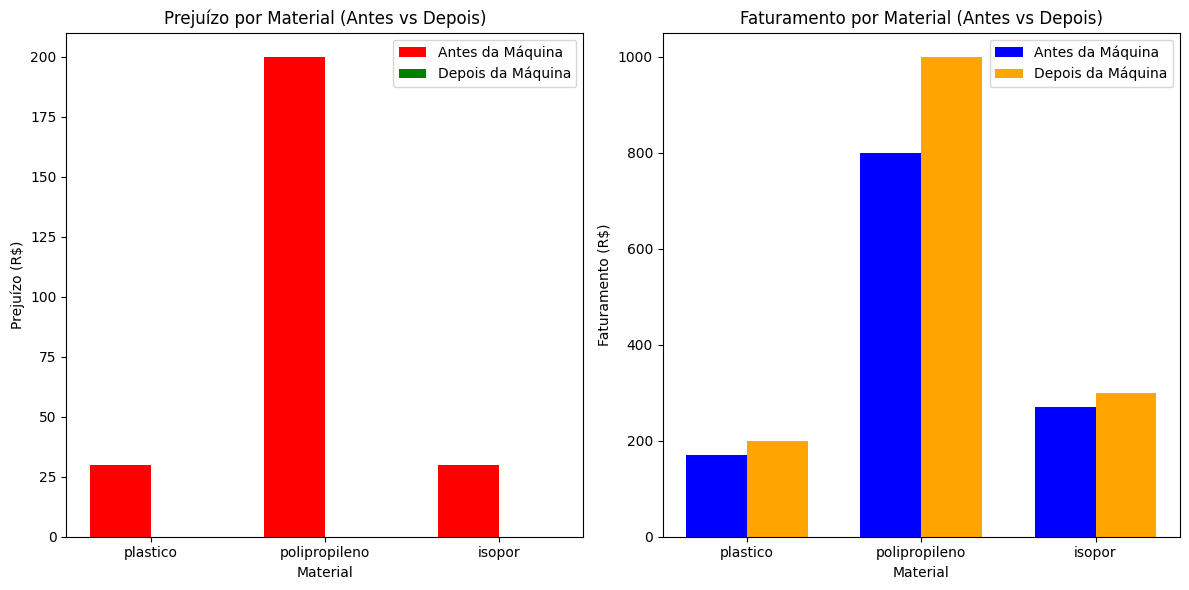

Prejuízo mensal antes da máquina: R$7800.00
Prejuízo mensal após a máquina: R$0.00
Faturamento mensal antes da máquina: R$37200.00
Faturamento mensal após a máquina: R$45000.00
Faturamento anual antes da máquina: R$446400.00
Faturamento anual após a máquina: R$540000.00


In [ ]:
# Dados para os gráficos
materiais = list(lista_copos.keys())

# Prejuízo antes e depois
prejuizo_antes = [lista_copos_defeito[material] * lista_valores[material] for material in materiais]
prejuizo_depois = [0 for _ in materiais]  # Prejuízo zerado após conserto

# Faturamento antes e depois
faturamento_antes = [(lista_copos[material] - lista_copos_defeito[material]) * lista_valores[material] for material in materiais]
faturamento_depois = [lista_copos[material] * lista_valores[material] for material in materiais]
# Faturamento anual total antes e depois
faturamento_anual_total_antes = faturamento_anual
faturamento_anual_total_depois = faturamento_anual_conserto

# Gráfico de Prejuízo antes e depois
plt.figure(figsize=(12, 6))

# Subplot 1: Prejuízo
plt.subplot(1, 2, 1)
bar_width = 0.35
index = range(len(materiais))

plt.bar(index, prejuizo_antes, bar_width, label='Antes da Máquina', color='red')
plt.bar([i + bar_width for i in index], prejuizo_depois, bar_width, label='Depois da Máquina', color='green')

plt.title('Prejuízo por Material (Antes vs Depois)')
plt.xlabel('Material')
plt.ylabel('Prejuízo (R$)')
plt.xticks([i + bar_width / 2 for i in index], materiais)
plt.legend()

# Subplot 2: Faturamento
plt.subplot(1, 2, 2)
plt.bar(index, faturamento_antes, bar_width, label='Antes da Máquina', color='blue')
plt.bar([i + bar_width for i in index], faturamento_depois, bar_width, label='Depois da Máquina', color='orange')

plt.title('Faturamento por Material (Antes vs Depois)')
plt.xlabel('Material')
plt.ylabel('Faturamento (R$)')
plt.xticks([i + bar_width / 2 for i in index], materiais)
plt.legend()

plt.tight_layout()
plt.show()

# Resultados Finais
print(f"Prejuízo mensal antes da máquina: R${prejuizo_mensal:.2f}")
print(f"Prejuízo mensal após a máquina: R${prejuizo_mensal_conserto:.2f}")
print(f"Faturamento mensal antes da máquina: R${faturamento_mensal:.2f}")
print(f"Faturamento mensal após a máquina: R${faturamento_mensal_conserto:.2f}")
print(f"Faturamento anual antes da máquina: R${faturamento_anual:.2f}")
print(f"Faturamento anual após a máquina: R${faturamento_anual_conserto:.2f}")

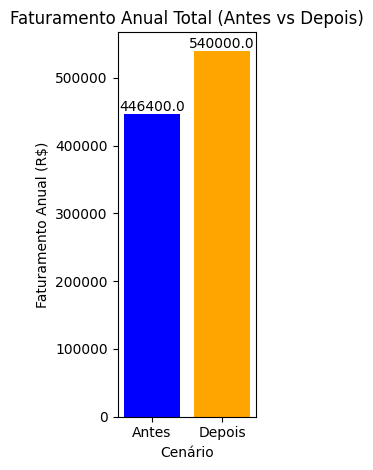

In [ ]:
# Subplot 3: Faturamento Anual Total
plt.subplot(1, 3, 3)
bars = plt.bar(["Antes", "Depois"],
               [faturamento_anual_total_antes, faturamento_anual_total_depois],
               color=['blue', 'orange'])

plt.title('Faturamento Anual Total (Antes vs Depois)')
plt.xlabel('Cenário')
plt.ylabel('Faturamento Anual (R$)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()